In [12]:
# Imports
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Data Retreival/Formatting ###

In [7]:
# Pull data

aapl_df = yf.download('AAPL', start='2022-01-01',interval='1h')[['Open','High','Low','Volume','Close']]
aapl_df.index.name = 'timestamp'

aapl_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Volume,Close
timestamp,,,,,
2022-01-03 09:30:00,177.830002,181.429993,177.710007,25170269,180.839996
2022-01-03 10:30:00,180.850006,181.770004,180.389999,11976542,181.749893
2022-01-03 11:30:00,181.750000,181.770004,181.074997,8143152,181.600006
2022-01-03 12:30:00,181.595001,182.279007,181.490005,8407914,182.229706
2022-01-03 13:30:00,182.225006,182.880005,181.809998,11618629,181.865005
...,...,...,...,...,...
2023-01-10 11:30:00,129.020004,129.240005,128.449997,6613647,129.119995
2023-01-10 12:30:00,129.110001,130.000000,129.051697,6298095,129.659897
2023-01-10 13:30:00,129.650101,130.690002,129.570007,7107016,130.361206


In [8]:
# Inspect dataframe

aapl_df.dtypes

Open      float64
High      float64
Low       float64
Volume      int64
Close     float64
dtype: object

In [9]:
# We make a copy of aapl_df so you don't have to re-download it if you mess it up.
aapl_df_play = aapl_df.copy()

In [10]:
# Shift data to predict price 1 hours in the future
aapl_df_play[['Open', 'High','Low','Volume','Close']]=aapl_df_play[['Open', 'High','Low','Volume','Close']].shift(1)
display(aapl_df_play.head())

# Drop rows w/ empty values
aapl_df_play = aapl_df_play.dropna()
display(aapl_df_play.head())

,Open,High,Low,Volume,Close
timestamp,,,,,
2022-01-03 09:30:00,NaN,NaN,NaN,NaN,NaN
2022-01-03 10:30:00,177.830002,181.429993,177.710007,25170269.0,180.839996
2022-01-03 11:30:00,180.850006,181.770004,180.389999,11976542.0,181.749893
2022-01-03 12:30:00,181.750000,181.770004,181.074997,8143152.0,181.600006
2022-01-03 13:30:00,181.595001,182.279007,181.490005,8407914.0,182.229706


,Open,High,Low,Volume,Close
timestamp,,,,,
2022-01-03 10:30:00,177.830002,181.429993,177.710007,25170269.0,180.839996
2022-01-03 11:30:00,180.850006,181.770004,180.389999,11976542.0,181.749893
2022-01-03 12:30:00,181.750000,181.770004,181.074997,8143152.0,181.600006
2022-01-03 13:30:00,181.595001,182.279007,181.490005,8407914.0,182.229706
2022-01-03 14:30:00,182.225006,182.880005,181.809998,11618629.0,181.865005


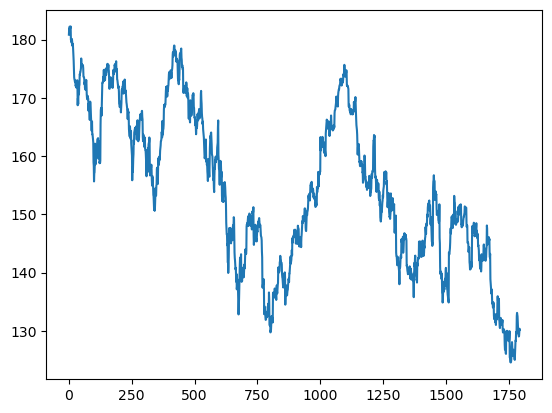

In [13]:
# Plot the data
plt.plot(range(len(aapl_df_play)), aapl_df_play[['Close']])